# Quality evaluation synthetic data

In [1]:
import pandas as pd
import numpy as np

import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('../../evaluation_metrics'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Load data

In [3]:
# Static data frames
original_static = pd.read_pickle('../../../../Master Thesis/data/preprocessed/tumours_patients_2017_train.pickle').set_index('eid').astype(str)
PBNPeps10_static = pd.read_pickle('./synthetic_data/PBSNP_eps10_tumours.pickle').astype(str)
PBNPeps1_static = pd.read_pickle('./synthetic_data/PBSNP_eps1_tumours.pickle').astype(str)
PBNPeps01_static = pd.read_pickle('./synthetic_data/PBSNP_eps0.1_tumours.pickle').astype(str)
MSNP_static = pd.read_pickle('./synthetic_data/MSNP_tumours.pickle').astype(str)
DGNP_static = pd.read_pickle('./synthetic_data/DGNP_tumours.pickle').astype(str)

In [4]:
# Treatments data frames
original_treatments = pd.read_pickle('../../../../Master Thesis/data/preprocessed/treatments_2017_train.pickle')
PBNPeps10_treatments = pd.read_pickle('./synthetic_data/PBSNP_eps10_treatments.pickle')
PBNPeps1_treatments = pd.read_pickle('./synthetic_data/PBSNP_eps1_treatments.pickle')
PBNPeps01_treatments = pd.read_pickle('./synthetic_data/PBSNP_eps0.1_treatments.pickle')
MSNP_treatments = pd.read_pickle('./synthetic_data/MSNP_treatments.pickle')
DGNP_treatments = pd.read_pickle('./synthetic_data/DGNP_treatments.pickle')

In [5]:
# Test data
original_test_static = pd.read_pickle('../../../../Master Thesis/data/preprocessed/tumours_patients_2017_test.pickle').set_index('eid').astype(str)
original_test_treatments = pd.read_pickle('../../../../Master Thesis/data/preprocessed/treatments_2017_test.pickle')

In [6]:
# th_gebeurtenis -> translation to main groups
th_gebeurtenis = pd.read_csv('../../../../Master Thesis/data/thesauri/th_gebeurtenis.csv', engine='python')

def _change_stoma_hoofdgroep(row):
    if 'stoma' in row['omschrijving'].lower():
        return 'STOMA'
    else:
        return row['hoofdgroep_code']

# Create maingroup dict 
th_gebeurtenis['hoofdgroep_code'] = th_gebeurtenis.apply(lambda row: _change_stoma_hoofdgroep(row), axis=1)
maingroup_dict = dict(zip(th_gebeurtenis['code'], th_gebeurtenis['hoofdgroep_code']))

In [7]:
synth_static = {
    'MSNP': MSNP_static, 
    'PBSNP bigger': PBNPeps10_static, 
    'PBSNP medium': PBNPeps1_static, 
    'PBSNP smaller': PBNPeps01_static, 
    'DGNP': DGNP_static
}

synth_treatments = {
    'MSNP': MSNP_treatments, 
    'PBSNP bigger': PBNPeps10_treatments, 
    'PBSNP medium': PBNPeps1_treatments, 
    'PBSNP smaller': PBNPeps01_treatments, 
    'DGNP': DGNP_treatments
}

In [8]:
feature_rename_dict = {'tum_topo_code': 'Topology code',
                       'pat_geslacht_code': 'Gender',
                       'tum_differentiatiegraad_code': 'Differentiation grade',
                       'tum_lymfklieren_positief_atl': 'Nr positive lymph nodes', 
                       'age_at_diagnosis': 'Age at diagnosis',
                       'tum_topo_sublokalisatie_code': 'Sublocation',
                       'stadium': 'Stage',
                       'survival_1': '1 year survival',
                       'gbs_gebeurtenis_code': 'Sequence length'}

## QualityEvaluator

In [9]:
from evaluator import QualityEvaluator

In [10]:
qe = QualityEvaluator(original_static, original_treatments, original_test_static, original_test_treatments,
                      maingroup_dict, synth_static, synth_treatments, feature_rename_dict=feature_rename_dict)

### Metric 1: Patient covariates

{'MSNP': 0.0010665387458661138,
 'PBSNP bigger': 0.0010789783340619066,
 'PBSNP medium': 0.0014612935954442562,
 'PBSNP smaller': 0.001890320130483335,
 'DGNP': 0.015121013919324975}

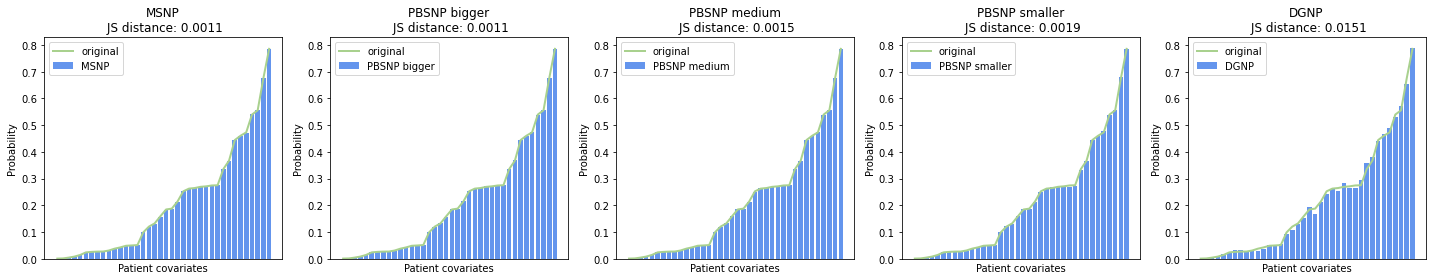

In [11]:
qe.m1_JSdistance_covariates(visual=True)

### Metric 2: RMSE treatment occurrence percentages

{'MSNP': 0.0037282933262658027,
 'PBSNP bigger': 0.00020217607217439806,
 'PBSNP medium': 0.00030372312573666716,
 'PBSNP smaller': 0.0008125283847873545,
 'DGNP': 0.002448805336316919}

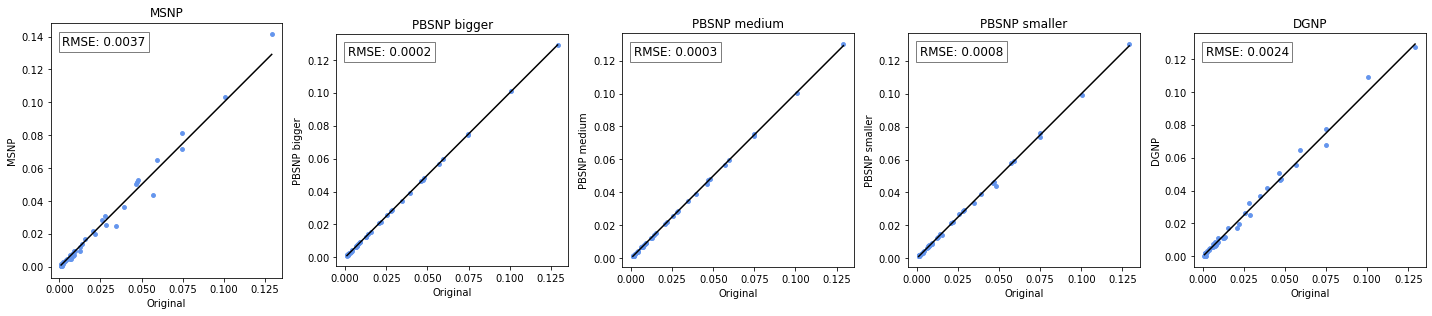

In [12]:
qe.m2_RMSE_treatment_occurrences(visual=True)

### Metric 3: Support Coverage treatments

In [13]:
qe.m3_SC_treatments()

{'MSNP': 1.0,
 'PBSNP bigger': 1.0,
 'PBSNP medium': 1.0,
 'PBSNP smaller': 1.0,
 'DGNP': 0.851063829787234}

### Metric 4: JS distance sequence lengths

{'MSNP': 0.13674420194900186,
 'PBSNP bigger': 0.0006807776258025282,
 'PBSNP medium': 0.002208822794779429,
 'PBSNP smaller': 0.006862431563683578,
 'DGNP': 0.020201106757942}

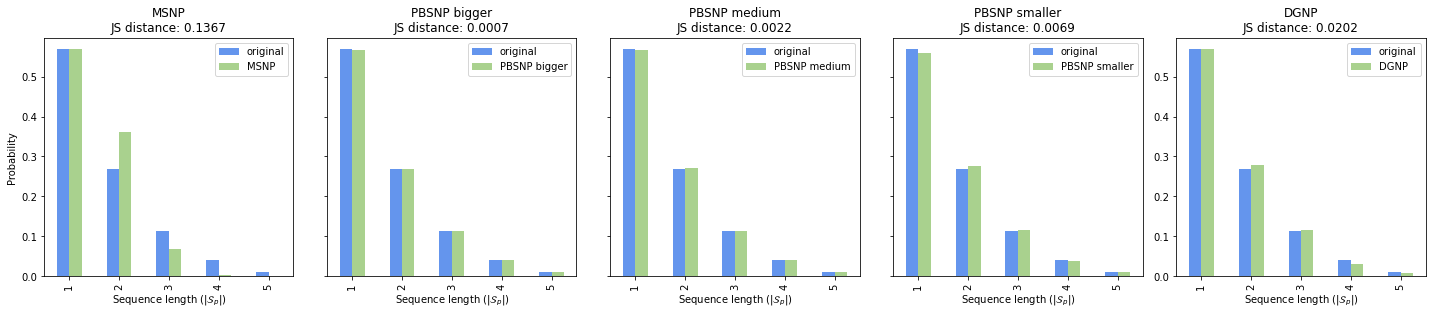

In [14]:
qe.m4_JSdistance_sequence_lengths(visual=True)

### Metric 5: Associations (PCD)

In [15]:
nominal_columns = list(set(original_static.columns) - set(['pat_geslacht_code', 'survival_1']))

In [16]:
nominal_columns = [feature_rename_dict[col] for col in nominal_columns]

{'MSNP': {'total': 3.7460000400656335,
  'static': 1.3884492786203284,
  'static_treatments': 2.2158220362393957,
  'treatments': 1.5116184400509987},
 'PBSNP bigger': {'total': 0.6872204119690755,
  'static': 0.09699198932731988,
  'static_treatments': 0.4597639544522076,
  'treatments': 0.20024650060915367},
 'PBSNP medium': {'total': 0.7272526477908426,
  'static': 0.17124989767221524,
  'static_treatments': 0.478030558907911,
  'treatments': 0.20626065006788752},
 'PBSNP smaller': {'total': 0.9594049760310388,
  'static': 0.20415011316779152,
  'static_treatments': 0.6414972667888582,
  'treatments': 0.23609987871988689},
 'DGNP': {'total': 1.133307371298989,
  'static': 0.18603899226689596,
  'static_treatments': 0.2904222256159265,
  'treatments': 1.0397523517326257}}

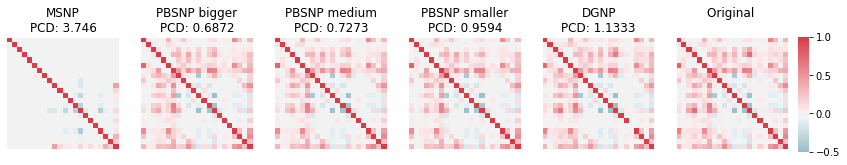

In [17]:
qe.m5_PCD(nominal_columns=nominal_columns, visual=True)

{'MSNP': {'total': 3.7460000400656335,
  'static': 1.3884492786203284,
  'static_treatments': 2.2158220362393957,
  'treatments': 1.5116184400509987},
 'PBSNP bigger': {'total': 0.6872204119690755,
  'static': 0.09699198932731988,
  'static_treatments': 0.4597639544522076,
  'treatments': 0.20024650060915367},
 'PBSNP medium': {'total': 0.7272526477908426,
  'static': 0.17124989767221524,
  'static_treatments': 0.478030558907911,
  'treatments': 0.20626065006788752},
 'PBSNP smaller': {'total': 0.9594049760310388,
  'static': 0.20415011316779152,
  'static_treatments': 0.6414972667888582,
  'treatments': 0.23609987871988689},
 'DGNP': {'total': 1.133307371298989,
  'static': 0.18603899226689596,
  'static_treatments': 0.2904222256159265,
  'treatments': 1.0397523517326257}}

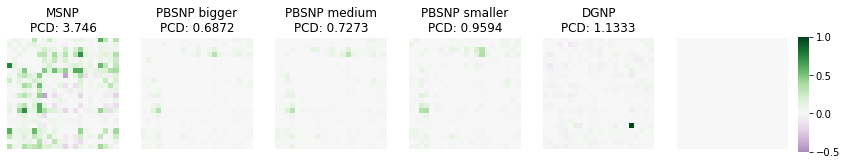

In [18]:
qe.m5_PCD(nominal_columns=nominal_columns, visual_difference=True)

{'MSNP': {'total': 3.7460000400656335,
  'static': 1.3884492786203284,
  'static_treatments': 2.2158220362393957,
  'treatments': 1.5116184400509987},
 'PBSNP bigger': {'total': 0.6872204119690755,
  'static': 0.09699198932731988,
  'static_treatments': 0.4597639544522076,
  'treatments': 0.20024650060915367},
 'PBSNP medium': {'total': 0.7272526477908426,
  'static': 0.17124989767221524,
  'static_treatments': 0.478030558907911,
  'treatments': 0.20626065006788752},
 'PBSNP smaller': {'total': 0.9594049760310388,
  'static': 0.20415011316779152,
  'static_treatments': 0.6414972667888582,
  'treatments': 0.23609987871988689},
 'DGNP': {'total': 0.5332781617885964,
  'static': 0.18603899226689596,
  'static_treatments': 0.2904222256159265,
  'treatments': 0.2847541973940436}}

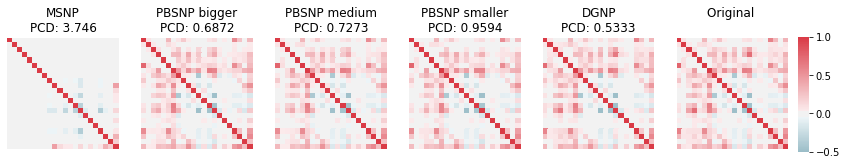

In [19]:
qe.m5_PCD(nominal_columns=nominal_columns, visual=True, fill_diagonal=True)

### Metric 6: TB-TOH

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 14.7min finished


Finished training model on original train set
Finished training model on MSNP
Finished training model on PBSNP bigger
Finished training model on PBSNP medium
Finished training model on PBSNP smaller
Finished training model on DGNP


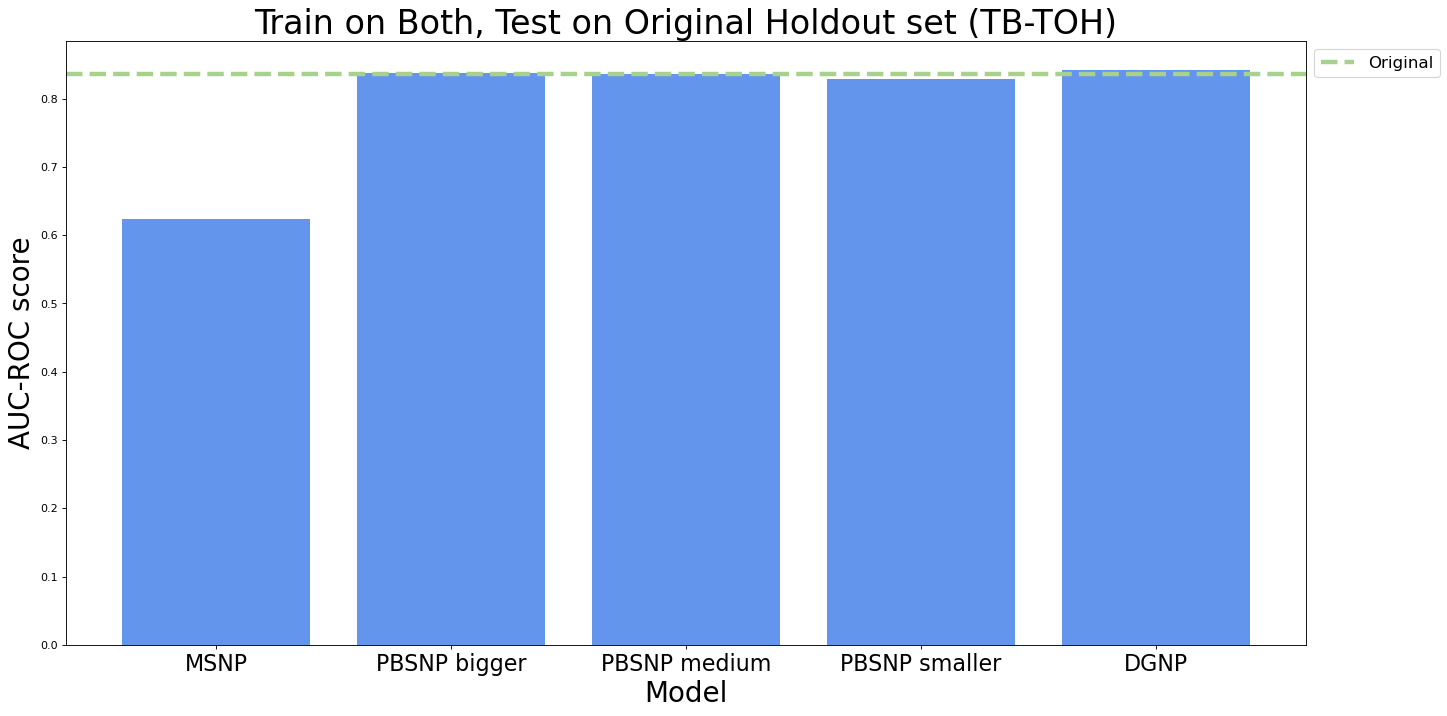

{'original': 0.8368029051156998,
 'MSNP': {'auc': 0.6232473266212528, 'TB_TOH': 0.74479584476954},
 'PBSNP bigger': {'auc': 0.8370333499506211, 'TB_TOH': 1.0002753872309866},
 'PBSNP medium': {'auc': 0.8367675697854657, 'TB_TOH': 0.9999577734135267},
 'PBSNP smaller': {'auc': 0.829321852160351, 'TB_TOH': 0.9910599581937226},
 'DGNP': {'auc': 0.8426418083243772, 'TB_TOH': 1.0069776325739095}}

In [20]:
qe.m6_TBTOH(n_jobs=-1, visual=True)

### Metric 7: Jaccard similarity Sequential Pattern Mining 

In [22]:
SPM_PATH = '../../../../../AppData/Local/conda/conda/envs/synthetic-data/Lib/site-packages'

In [23]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH)

Finished SPM original
Finished SPM MSNP
Finished SPM PBSNP bigger
Finished SPM PBSNP medium
Finished SPM PBSNP smaller
Finished SPM DGNP


{'original': {'# frequent sequential patterns': 51},
 'MSNP': {'# frequent sequential patterns': 24,
  'intersection size': 10,
  'union size': 65,
  'jaccard similarity': 0.15384615384615385},
 'PBSNP bigger': {'# frequent sequential patterns': 48,
  'intersection size': 45,
  'union size': 54,
  'jaccard similarity': 0.8333333333333334},
 'PBSNP medium': {'# frequent sequential patterns': 46,
  'intersection size': 43,
  'union size': 54,
  'jaccard similarity': 0.7962962962962963},
 'PBSNP smaller': {'# frequent sequential patterns': 44,
  'intersection size': 42,
  'union size': 53,
  'jaccard similarity': 0.7924528301886793},
 'DGNP': {'# frequent sequential patterns': 45,
  'intersection size': 43,
  'union size': 53,
  'jaccard similarity': 0.8113207547169812}}

#### Robustness check

In [24]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH,
                            support=0.02)

Finished SPM original
Finished SPM MSNP
Finished SPM PBSNP bigger
Finished SPM PBSNP medium
Finished SPM PBSNP smaller
Finished SPM DGNP


{'original': {'# frequent sequential patterns': 26},
 'MSNP': {'# frequent sequential patterns': 4,
  'intersection size': 2,
  'union size': 28,
  'jaccard similarity': 0.07142857142857142},
 'PBSNP bigger': {'# frequent sequential patterns': 25,
  'intersection size': 23,
  'union size': 28,
  'jaccard similarity': 0.8214285714285714},
 'PBSNP medium': {'# frequent sequential patterns': 25,
  'intersection size': 23,
  'union size': 28,
  'jaccard similarity': 0.8214285714285714},
 'PBSNP smaller': {'# frequent sequential patterns': 25,
  'intersection size': 23,
  'union size': 28,
  'jaccard similarity': 0.8214285714285714},
 'DGNP': {'# frequent sequential patterns': 21,
  'intersection size': 21,
  'union size': 26,
  'jaccard similarity': 0.8076923076923077}}

In [25]:
qe.m7_jaccardsimilarity_SPM(spmf_bin_location_dir=SPM_PATH,
                            support=0.03)

Finished SPM original
Finished SPM MSNP
Finished SPM PBSNP bigger
Finished SPM PBSNP medium
Finished SPM PBSNP smaller
Finished SPM DGNP


{'original': {'# frequent sequential patterns': 13},
 'MSNP': {'# frequent sequential patterns': 2,
  'intersection size': 1,
  'union size': 14,
  'jaccard similarity': 0.07142857142857142},
 'PBSNP bigger': {'# frequent sequential patterns': 13,
  'intersection size': 11,
  'union size': 15,
  'jaccard similarity': 0.7333333333333333},
 'PBSNP medium': {'# frequent sequential patterns': 12,
  'intersection size': 11,
  'union size': 14,
  'jaccard similarity': 0.7857142857142857},
 'PBSNP smaller': {'# frequent sequential patterns': 12,
  'intersection size': 11,
  'union size': 14,
  'jaccard similarity': 0.7857142857142857},
 'DGNP': {'# frequent sequential patterns': 10,
  'intersection size': 10,
  'union size': 13,
  'jaccard similarity': 0.7692307692307693}}